<a href="https://colab.research.google.com/github/fatemafaria142/Loan-Approval-Prediction-using-Machine-Learning-Algorithms/blob/main/Loan_Approval_Prediction_using_XGBClassifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Pip 21.3+ is required
!pip install xgboost

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, log_loss, confusion_matrix

In [4]:
file_path = "/content/drive/MyDrive/Practice_Project_Datasets/Applicant-details.csv"

# Read the CSV file into a DataFrame
df = pd.read_csv(file_path)

In [5]:
# Display the first few rows of the DataFrame
print("First few rows:")
df.head()

First few rows:


,Applicant_ID,Annual_Income,Applicant_Age,Work_Experience,Marital_Status,House_Ownership,Vehicle_Ownership(car),Occupation,Residence_City,Residence_State,Years_in_Current_Employment,Years_in_Current_Residence,Loan_Default_Risk
0,75722,9657655,76,0,single,rented,no,Psychologist,Jalandhar,Punjab,0,12,0
1,80185,9259353,37,18,single,rented,no,Petroleum_Engineer,Bally,West_Bengal,12,11,0
2,19865,1509721,66,8,single,rented,no,Drafter,Indore,Madhya_Pradesh,4,12,0
3,76700,5867312,43,1,single,owned,no,Chartered_Accountant,Kurnool[18],Andhra_Pradesh,1,13,1
4,92992,7223191,44,9,single,rented,no,Air_traffic_controller,Asansol,West_Bengal,9,13,0


In [6]:
# Assuming df is our DataFrame
df['Residence_City'] = df['Residence_City'].str.replace(r'', '', regex=True)
df['Residence_State'] = df['Residence_State'].str.replace(r'', '', regex=True)

In [7]:
# Display the last few rows of the DataFrame
print("\nLast few rows:")
df.tail()


Last few rows:


,Applicant_ID,Annual_Income,Applicant_Age,Work_Experience,Marital_Status,House_Ownership,Vehicle_Ownership(car),Occupation,Residence_City,Residence_State,Years_in_Current_Employment,Years_in_Current_Residence,Loan_Default_Risk
99995,6266,156398,69,10,single,rented,yes,Technology_specialist,Bathinda,Punjab,7,14,0
99996,54887,1900932,69,11,single,rented,no,Mechanical_engineer,Erode[17],Tamil_Nadu,5,10,0
99997,76821,6395936,66,11,single,owned,no,Comedian,Gandhinagar,Gujarat,11,14,0
99998,861,4505937,52,6,single,rented,no,Petroleum_Engineer,Mangalore,Karnataka,6,14,0
99999,15796,4186842,58,9,single,rented,yes,Librarian,Raebareli,Uttar_Pradesh,5,13,0


In [8]:
# Step 1: Label Encoding for Categorical columns
label_encoder = LabelEncoder()
df['Marital_Status'] = label_encoder.fit_transform(df['Marital_Status'])
df['House_Ownership'] = label_encoder.fit_transform(df['House_Ownership'])
df['Vehicle_Ownership(car)'] = label_encoder.fit_transform(df['Vehicle_Ownership(car)'])
df['Occupation'] = label_encoder.fit_transform(df['Occupation'])
df['Residence_City'] = label_encoder.fit_transform(df['Residence_City'])
df['Residence_State'] = label_encoder.fit_transform(df['Residence_State'])

In [9]:
# Display the first few rows of the DataFrame
print("After Label Encoding:")
df.head()

After Label Encoding:


,Applicant_ID,Annual_Income,Applicant_Age,Work_Experience,Marital_Status,House_Ownership,Vehicle_Ownership(car),Occupation,Residence_City,Residence_State,Years_in_Current_Employment,Years_in_Current_Residence,Loan_Default_Risk
0,75722,9657655,76,0,1,2,0,40,129,19,0,12,0
1,80185,9259353,37,18,1,2,0,36,29,28,12,11,0
2,19865,1509721,66,8,1,2,0,19,126,13,4,12,0
3,76700,5867312,43,1,1,1,0,7,170,0,1,13,1
4,92992,7223191,44,9,1,2,0,0,23,28,9,13,0


In [11]:
# Step 2: MinMax Scaling for numerical columns
scaler = MinMaxScaler()
numerical_columns = ['Annual_Income',	'Applicant_Age',	'Work_Experience',	'Marital_Status',	'House_Ownership',	'Vehicle_Ownership(car)',	'Occupation',	'Residence_City',	'Residence_State', 'Years_in_Current_Employment','Years_in_Current_Residence']
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

In [12]:
# Step 3: Drop 'label' column
X = df.drop(['Applicant_ID','Loan_Default_Risk'], axis=1)
y = df['Loan_Default_Risk']

In [13]:
# Step 4: Train-Test Split (80% train, 20% test) with stratify
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [14]:
# Create XGBoost model for binary classification
model = xgb.XGBClassifier(objective='binary:logistic', random_state=42)
# Train the model
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [15]:
# Predictions on the test set
y_pred = model.predict(X_test)

In [17]:
# Binary classification evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
logloss = log_loss(y_test, model.predict_proba(X_test)[:, 1])  # Use predict_proba for log loss in binary classification
conf_matrix = confusion_matrix(y_test, y_pred)

# Print the metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"Log Loss: {logloss:.4f}")

Accuracy: 0.9140
Precision: 0.7337
Recall: 0.5310
F1 Score: 0.6161
Log Loss: 0.1794


In [18]:
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[16900   501]
 [ 1219  1380]]


<ipython-input-27-31fb4172b4dc>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar_plot = sns.barplot(x='Metric', y='Value', data=metrics_df, palette=custom_colors, dodge=False)


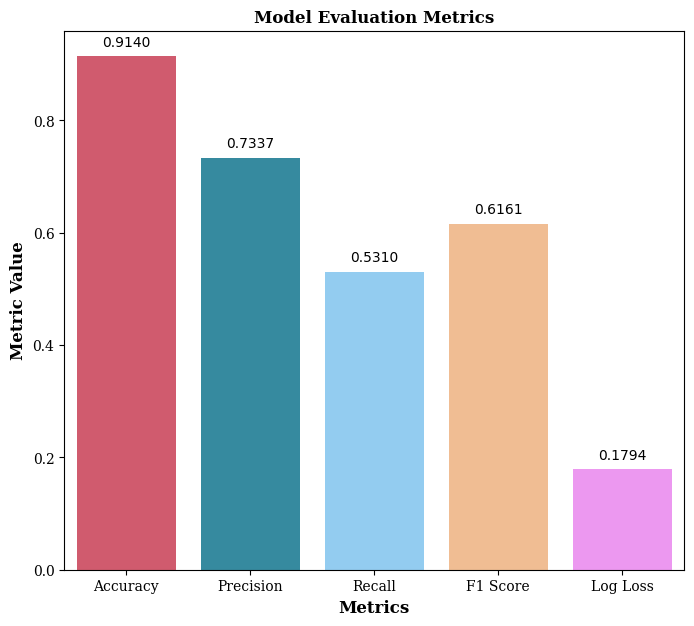

In [27]:
# Create a dictionary with metric names and values
metrics_dict = {'Accuracy': accuracy, 'Precision': precision, 'Recall': recall, 'F1 Score': f1,'Log Loss':logloss}

# Convert the dictionary to a DataFrame for easy plotting
metrics_df = pd.DataFrame(list(metrics_dict.items()), columns=['Metric', 'Value'])

# Define custom colors for the bars
custom_colors = ['#e34861', '#2595b0', '#84d0ff', '#ffbb84','#f989ff']

# Define custom font dictionary for title and labels
font = {'family': 'Serif', 'weight': 'bold', 'size': 12}

plt.rcParams["figure.figsize"] = (8, 7)

# Use the hue parameter instead of palette
bar_plot = sns.barplot(x='Metric', y='Value', data=metrics_df, palette=custom_colors, dodge=False)

# Set title and axis labels using custom fontdict
plt.xlabel('Metrics',fontdict=font)
plt.ylabel('Metric Value',fontdict=font)
plt.title('Model Evaluation Metrics',fontdict=font)

# Annotate the bars with their values
for p in bar_plot.patches:
    bar_plot.annotate(f'{p.get_height():.4f}',
                      (p.get_x() + p.get_width() / 2., p.get_height()),
                      ha='center', va='center', fontsize=10, color='black', xytext=(0, 10), textcoords='offset points')

# Set custom font for ticks on both x and y axes with rotation
plt.xticks(fontname='Serif', fontsize=10)
plt.yticks(fontname='Serif', fontsize=10)

# Show the plot
plt.show()


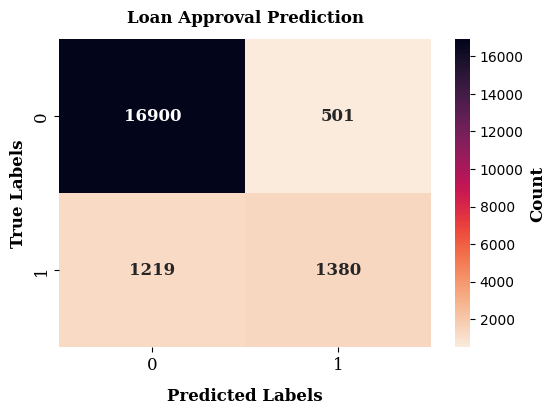

In [28]:
# Plot confusion matrix
plt.figure(figsize=(6, 4))
# Define the custom palette
custom_palette = sns.color_palette("rocket_r", as_cmap=True)# Modify the number based on number of classes in the dataset
# Define custom font dictionary for title and labels
font = {'family': 'Serif', 'weight': 'bold', 'size': 12}

# Create heatmap with annotations and colormap
heatmap = sns.heatmap(conf_matrix, annot=True, fmt='d', cmap=custom_palette,
                      xticklabels=[0,1],
                      yticklabels=[0,1],
                      annot_kws={"family": "Serif",'weight': 'bold', 'size': 12})

# Set x and y labels with the custom font dictionary
heatmap.set_xlabel('Predicted Labels', fontdict=font)
heatmap.set_ylabel('True Labels', fontdict=font)
heatmap.set_title('Loan Approval Prediction', fontdict=font, pad=12)

# Set font properties for tick labels on both axes
heatmap.set_xticklabels(heatmap.get_xticklabels(), fontname='Serif', fontsize=12)
heatmap.set_yticklabels(heatmap.get_yticklabels(), fontname='Serif', fontsize=12)

# Create a color bar to indicate the scale
cbar = heatmap.collections[0].colorbar
cbar.set_label('Count', fontdict=font)
cbar.ax.tick_params(labelsize=10)
# Adjust padding between x-axis label and x-axis ticks
plt.gca().xaxis.labelpad = 10  # Change the value as needed to adjust the space
plt.show()